<a href="https://colab.research.google.com/github/R267/Marchenko-lab5/blob/main/task1_ukrainian_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nicapotato_womens_ecommerce_clothing_reviews_path = kagglehub.dataset_download('nicapotato/womens-ecommerce-clothing-reviews')

print('Data source import complete.')


Data source import complete.


# In-Depth Simple Linear Regression Analysis for Age mean and Recommended Likelihood
## Women's Clothing E-Commerce Dataset
_by Nick Brooks, February 2018_

- [**Github**](https://github.com/nicapotato)
- [**Kaggle**](https://www.kaggle.com/nicapotato/)
- [**Linkedin**](https://www.linkedin.com/in/nickbrooks7)

***


# Tables of Content:

[Exploratory Analaysis - Notebook Counterpart](https://www.kaggle.com/nicapotato/guided-numeric-and-text-exploration-e-commerce)

**1. Simple Linear Regression Analysis for Age mean and Recommended Likelihood**
    - 1.1 How to Interpret Linear Regression Output
    - 1.2 Interpret Results for Recommended Likelihood and Age Mean Regression
    - 1.3 Residual Visualization [Like found in R Studio]
    - 1.4 Steps to Improve Model
    - 1.5 Reflection on Randomness


In [2]:
# General
import numpy as np
import pandas as pd

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling
import statsmodels.api as sm

# Read and Peak at Data
df = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")
df.drop(df.columns[0],inplace=True, axis=1)

# Delete missing observations for following variables
df = df[df.notnull()]

# Data Dimensions
print("Dataframe Dimension: {} Rows, {} Columns".format(*df.shape))

Dataframe Dimension: 23486 Rows, 10 Columns


***
# **1. Simple Linear Regression Analysis for Age mean and Recommended Likelihood** <br>
In this part, I want to take a more theorical approach by taking a dive deep into simple linear regression with the goal of explaining, as best as I can, how do evaluate the findings from a *ordinary least squares linear regression*. Here is my best shot at it.

My motivation for this is twofold. A friend recently gifted me **Nassim Nicholas Taleb**'s *The Black Swan: The Impact of the Highly Improbable*, which explores the limitations of empiricism when modeling and predicting the future, which may be severely impacted by unforseen phenomenon. This has convinced me to review some of the most simple aspects of statistics, and for my own educational sake, attempt to synthesize them with my own words. Wait what? This notebook is selfish in nature. Yes, some kind of selfish altruism, with the hopes that you all may provide me with feedback on my blindspots.

The second piece contributed to this section is **EconTalk**'s podcast from Janurary 20th 2018 *John Ioannidis on Statistical Significance, Economics, and Replication*, which describes the reasons behind the replication crisis in social sciences. John P. A. Ioannidis is a Professor of Medicine and of Health Research and Policy at Stanford University School of Medicine and a Professor of Statistics at Stanford University School of Humanities and Sciences, outlines the central issues of using low-powered, unrepresentative, and p-hacked regression models to jump to causal conclusions. Furthremore, the academic incentive of publishing groundbreaking prevents non-thrill analysis from representation. Publishing a paper about the lack of relationship is part of the fabric of scientific discovery through exclusion.

**Engineering and Data Science:** <br>
It is important to acknowledge that the very process of exploring a dataset from scratch is a form of inductive reasoning, since we are not running each variable against the other in a vaccum, but still making inferences. On the other hand, most engineering problems revolve around a fixed physical system open to bottom-up experimentation. Most casual data analysis attempts to stop patterns, trends, and with the help of statistics: Causation. This is often because the Data Scientist's environment is highly complex, and far from being a controlled environment. We deal with these environments by simplifying their representation; reducing their dimensionality, using robust linear models, and assuming neat general distributions. Indeed, through the Law of Large Numbers, statisticians can assume that most continuous data generating systems converge to a bell-shaped probability curve.

This brings me to differentiate between *Extremistan* and *Mediocristan*. Taleb is highly critical of the use of limited inductive techniques, such as the bell curve, to model systems with rare, but earth-shattering outliers. Recall the Pareto Distribution of the "Positive Feedback Count" variable, and how its internalized positive feedback loop created a high, compounding inequality. I think this point is important to keep in mind when prescribing any model or solution to a environment at hand.

Note that my model is not trying to represent a system plagued with highly exponential variables prone to severe outliers, as found in quote Taleb's "Extremistans" (e.g financial time-series models). Furthermore, the stacks are not as high, but nevertheless I still want to take a serious look at the underlying methods and what they mean when used within my environment at hand.

**Simple Regression: Does Average Age correlate with Likelihood of Recommendation for Clothing Classes:** <br>
Since this is such a simple model, pursuing causation is unrealistic.

In [3]:
key = "Class Name"
temp = (df.groupby(key)[["Rating","Recommended IND", "Age"]]
        .aggregate(['count','mean']))
temp.columns = ["Count","Rating Mean","Recommended Likelihood Count",
                "Recommended Likelihood","Age Count","Age Mean"]
temp.drop(["Recommended Likelihood Count","Age Count"], axis=1, inplace =True)

# Simple Linear Regression Model
model_fit = sm.OLS(temp["Recommended Likelihood"],
               sm.add_constant(temp["Age Mean"])).fit()
temp['resid'] = model_fit.resid

print("Ordinary Least Squares Model Ready")

Ordinary Least Squares Model Ready


**Function:** <br>
$y = mx + b + e$

Where *y* is the dependent variable, *x* is the independent variable, *m* is the sloped of the independent variable, and *E* is the error term.

**Code Explanation:** <br>
In order to ensure the intercept, the *b* term, `sm.add_constant(XVAR)` is used around the independent variable.

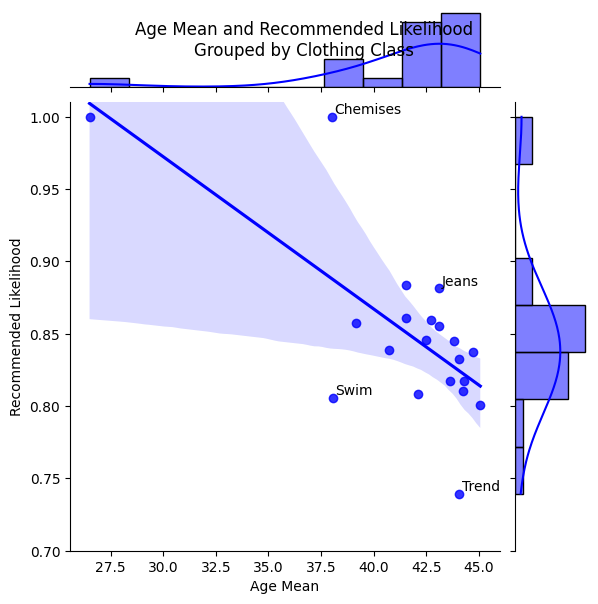

,Count,Rating Mean,Recommended Likelihood,Age Mean,resid
Class Name,,,,,
Casual bottoms,2,4.5,1.0,26.5,-0.009266
Chemises,1,4.0,1.0,38.0,0.111798


In [4]:
# Plot
g = sns.jointplot(y="Recommended Likelihood",x='Age Mean',data=temp,
                  kind='reg', color='b')
plt.subplots_adjust(top=0.999)
g.fig.suptitle("Age Mean and Recommended Likelihood\nGrouped by Clothing Class")
plt.ylim(.7, 1.01)

# Annotate Outliers
head = temp.sort_values(by=['resid'], ascending=[False]).head(2)
tail = temp.sort_values(by=['resid'], ascending=[False]).tail(2)

def ann(row):
    ind = row[0]
    r = row[1]
    plt.gca().annotate(ind, xy=( r["Age Mean"], r["Recommended Likelihood"]),
            xytext=(2,2) , textcoords ="offset points", )

for row in head.iterrows():
    ann(row)
for row in tail.iterrows():
    ann(row)

plt.show()
del head, tail

temp[temp["Recommended Likelihood"] > .95]

**Interpretation:** <br>
p-value of 0.00045? Welp, nothing more to see here.

In all seriousness, this regression may look trustworthy at first glance, but it is paramount that the assumptions of the regression are double checked before getting your hopes up. Regression models are an notoriously abused tool, which I will attempt to clarify. I have some experience with statistics in R Studio, so I will do my best.

Also, domain knowledge must be consulted in order to very the effect, and to confirm the absence of reverse causality.

***

**Formal Model Output:**

**Interpretation:** <br>
Sources:
- [Ordinary Least Squares in Python by Peter Prettenhofer](https://www.datarobot.com/blog/ordinary-least-squares-in-python/)
- [Minitab Blog](http://blog.minitab.com/) (Superb walkthroughs and guides)

Re-interpreted this article for a machine learning crowd with corrections and elaborations.

### 1.1 How to Interpret Linear Regression Output

**First Table:** <br>
**The left part of the first table provides basic information about the model fit:** <br>
- **Dep. Variable:** Singular. Which variable is the point of interest of the model
- **Model:** Technique used, abbreviated version of **Method** (see methods for more).
- **Method:** The loss function optimized in the parameter selection process. *Least Squares* since it picks the parameters that reduce the training error. AKA Mean Square Error **[MSE]**.
- **No. Observations:** The number of observations used by the model. Size of training data.
- **[Degrees of Freedom Residuals](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics):** Degrees of freedom of the residuals. Number of observations – number of parameters. Intercept is a parameter. The purpose of Degrees of Freedom is to reflect the impact of descriptive/summarizing statistics in the model, which in regression is the coefficient. Since the observations must "live up" to these parameters, they only have so many free observations, and the rest must be reserved to "live up" to the parameters' prophecy. Internal mechanism to ensures that there are enough observations to parameters.
- [**Degrees of Freedom Model:**](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html) Number of parameters in the model (not including the constant/intercept term if present)
- [**Covariance Type:**](https://en.wikipedia.org/wiki/Robust_regression) Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process. Since this model is *Ordinary Least Squares*, it is non-robust and therefore highly sensitive to outliers.

**The right part of the first table shows the goodness of fit** <br>
- **R-squared:** The coefficient of determination, the Sum Squares of Regression divided by Total Sum Squares. In English, translates in the percent of variance explained by the model. The remaining percentage represents the variance explained by error, the E term, that which the model and predictors fail to grasp.
- **Adj. R-squared:** Version of the R-Squared that penalizes additional independent variables. Similar to the concept of flexibility in the Bias-Variance tradeoff where high flexibility reduces bias, but puts the model at risk of high variance; the magnitude of effect a single observation can have on the model outcome. This lowers model robustness and model generalization.
- **F-statistic:** A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals. Feeds into the calculation of the P-Value.
- **Prob (F-statistic) or P-Value:** The probability that a sample like this would yield the above statistic, and whether the models verdict on the null hypothesis will consistently represent the population. Does not measure effect magnitude, instead measures the integrity and consistency of this test on this group of data.
- **Log-likelihood:** The log of the likelihood function.
- **AIC:** The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. Penalizes the model selection metrics when more independent variables are added.
- **BIC:** The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. Penalizes the model selection metrics when more independent variables are added.

**Second Table:** Coefficient Reports <br>
- **coef:** The estimated value of the coefficient. By how much the model multiplies the independent value by.
- [**std err:**](http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-to-interpret-s-the-standard-error-of-the-regression) The basic standard error of the estimate of the coefficient. Average distance deviation of the points from the model, which offers a unit relevant way to gauge model accuracy.
- **t:** The t-statistic value. This is a measure of how statistically significant the coefficient is.
- **P > |t|:** P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
- **[95.0% Conf. Interval]:** The lower and upper values of the 95% confidence interval. Specific range of the possible coefficient values.

**Third Table:** Residuals, Autocorrelation, and Multicollinearity <br>
- **Skewness:** A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line). The normal distribution has 0 skew.
- **Kurtosis:** A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails), so model "peakyness". The normal distribution has a [Kurtosis of 3](https://brownmath.com/stat/shape.htm), and the greater the number, the more the curve peaks.
- **Omnibus	D’Angostino’s test:** It provides a combined statistical test for the presence of skewness and kurtosis.
- **Prob(Omnibus):** The above statistic turned into a probability
- **Jarque-Bera:** A different test of the skewness and kurtosis
- **Prob (JB):** The above statistic turned into a probability
- **Durbin-Watson:** A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis
- **Cond. No:** A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).
***


In [5]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Recommended Likelihood   R-squared:                       0.513
Model:                                OLS   Adj. R-squared:                  0.485
Method:                     Least Squares   F-statistic:                     18.93
Date:                    Fri, 02 May 2025   Prob (F-statistic):           0.000385
Time:                            07:50:41   Log-Likelihood:                 35.341
No. Observations:                      20   AIC:                            -66.68
Df Residuals:                          18   BIC:                            -64.69
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2882      0.101     12.724      0.000       1.076       1.501
Age Mean      -0.0105      0.002     -4.351      0.000      -0.016      -0.005
==============================================================================
Omnibus:                        3.822   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                2.041
Skew:                           0.237   Prob(JB):                        0.360
Kurtosis:                       4.491   Cond. No.                         435.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1.2 Simple OLS Linear Regression: Interpret Results for Recommended Likelihood and Age Mean

**First Table:** <br>
Around 50% of the Recommended Likelihood is explained by Average Age when looking at Clothing Classes. Causal link cannot be established without further domain knowledge and checks on residuals. The p-value of 0.00047 suggests that this sample is significant representation of the group 99.953 % of the time. Twenty observations is a small sample size. Perhaps I would be better off not averaging the data by clothing class and instead use dummy variables to differentiate clothing class, especially since the only way to augment my data size would be deploy new products, which would not be justified.

**Second Table:** <br>
Since the slope of the independent variable *Age Mean* is -0.0102, a change of average of 1 year will decrease the likelihood of receiving a recommendation by 1%, but this statement is usually wrong by 0.2 % (standard error). From the constant (or intercept) term, we are able to see that the trend starts at 120% likelihood. These variables are individually significant (p-value is 0.000).

**Third Table:** <br>
Slight positive skew, with more peak than the normal distribution. More concentrated points towards the middle. Multicollinearity is not of concern since I only have one variable, an Durbin-Watson's test for autocorrelation is below 2, so there is no concern.
***

### 1.3 Residual Visualization [Like found in R Studio]

Anybody familiar with R Studios' following code <br>
`lm_model <- lm(kaggle_popularity~potatoes_eaten, data=bureau_of_potato_statistics)` <br>
`par(mfrow=c(2,2))` <br>
`plot(lm_model)`

Will be happy to see an interpreted version in Python's `Matplotlib` and `Statsmodels`. These plots once made it hard for me to spend time away from R, but I'm glad I can now replicate similar analysis with Python. Of course, R still dominates the statistical world, especially since most researchers cater their novelties towards it before other programming languages.

*Disclaimer: I have not yet compared output with R Studio's*

**Citation:** <br>
- [**Source**](https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034) **for Residual Plots**, **Authored by** [Emre Can](https://medium.com/@emredjan)

**Note:** Emre's code has been slightly modified for matplotlib subplots.

In [6]:
# Residual Plots
def regression_residual_plots(model_fit, dependent_var, data, size = [10,10]):
    """
    This function requires:
        import matplotlib.pyplot as plt
        import statsmodels.api as sm

    Arguments:
    model_fit: It takes a fitted model as input.
        Obtainable through Statsmodels regression:
            model_fit = sm.OLS(endog= DEPENDENT VARIABLE, exog= INDEPENDENT VARIABLE).fit()
    dependent_var: string of the pandas column used as the model dependent variable.
    data: pandas dataset where the dependent variable is located. The model data.
    size: default [10,10]. Updates the [width, height], inputed in matplotlibs figsize = [10,10]

    Ive only run it on simple, non-robust, ordinary least squares models,
    but these metrics are standard for linear models.
    """

    # Extract relevant regression output for plotting
    # fitted values (need a constant term for intercept)
    model_fitted_y = model_fit.fittedvalues
    # model residuals
    model_residuals = model_fit.resid
    # normalized residuals
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal
    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    # absolute residuals
    model_abs_resid = np.abs(model_residuals)
    # leverage, from statsmodels internals
    model_leverage = model_fit.get_influence().hat_matrix_diag
    # cook's distance, from statsmodels internals
    model_cooks = model_fit.get_influence().cooks_distance[0]

    ########################################################################
    # Plot Size
    fig = plt.figure(figsize=size)

    # Residual vs. Fitted
    ax = fig.add_subplot(2, 2, 1)
    sns.residplot(x=model_fitted_y, y=model_residuals,
              lowess=True,
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax)
    ax.set_title('Residuals vs Fitted')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')


    # Annotations of Outliers
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]
    for i in abs_resid_top_3.index:
        ax.annotate(i, xy=(model_fitted_y[i], model_residuals[i]));

    ########################################################################
    # Normal Q-Q
    ax = fig.add_subplot(2, 2, 2) # Top Right
    QQ = sm.ProbPlot(model_norm_residuals)
    QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1, ax=ax)
    ax.set_title('Normal Q-Q')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Standardized Residuals')

    # Annotations of Outliers
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        ax.annotate(i, xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                model_norm_residuals[i]));

    ########################################################################
    # Scale-Location
    ax = fig.add_subplot(2, 2, 3)
    ax.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
    sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)
    ax.set_title('Scale-Location')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel(r'$\sqrt{|Standardized Residuals|}$')

    # Annotations of Outliers
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        ax.annotate(i,
                                   xy=(model_fitted_y[i],
                                       model_norm_residuals_abs_sqrt[i]));

    ########################################################################
    # Cook's Distance Plot
    ax = fig.add_subplot(2, 2, 4) # Bottom Right
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(x=model_leverage, y=model_norm_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

    ax.set_xlim(0, 0.20)
    ax.set_ylim(-3, 5)
    ax.set_title('Residuals vs Leverage')
    ax.set_xlabel('Leverage')
    ax.set_ylabel('Standardized Residuals')

    # Annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        ax.annotate(i, xy=(model_leverage[i],model_norm_residuals[i]))

    # Shenanigans for Cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')
    p = len(model_fit.params) # number of model parameters
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
          np.linspace(0.001, 0.200, 50),
          'Cook\'s distance') # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
          np.linspace(0.001, 0.200, 50)) # 1 line
    plt.legend(loc='upper right')
    plt.savefig('residual_plots.png',bbox_inches='tight')
    plt.show()

print("Residual Plots Function Ready")

Residual Plots Function Ready


/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
<ipython-input-6-b2ede3eecf5c>:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(model_fitted_y[i],


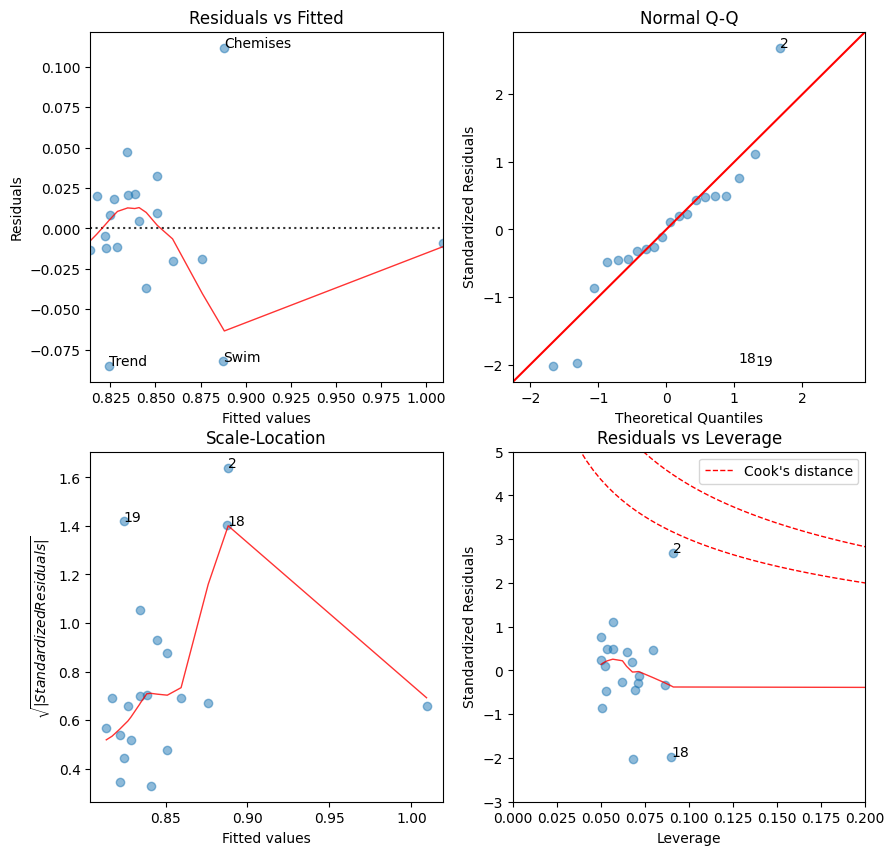

In [7]:
regression_residual_plots(model_fit, dependent_var="Recommended Likelihood",data=temp)

**Goal:** <br>
This analysis is focused on checking the assumptions of a regression model by looking at its residuals.

**Residual vs. Fitted:** <br>
Assumption of linearity. Since the line does not remain horizontally straight at y=0, assumption is broken. Furthermore, it is clear that there are isolated points, especially the point on the right. Perhaps the relationship is non-linear.

**Normal Q-Q:** <br>
Assumption of normality. The runoff tails on either end of the plot suggest that the residuals are not normally distributed. This is another limitation of the model.

**Scale-Location:** <br>
There appears to be high residual outliers, breaking the assumption of constant variance. There is an imbalance of points across the x-axis, where there is a higher occurrence of fitted values under the fitted value of 0.9. This plot also observes the existence of "heteroskedasticity", which means there is an increasing or decreasing standardized residuals, suggesting that the model is having a problem across magnitudes of data.

**Residuals vs Leverage:** <br>
Cook's distance is a plot to spot outliers in the data. The value with index 2 is flirting with the first dotted red line. If values exceed the farthest dotted red line, it is a problematic piece of data, since it wields high leverage (power) over the model.

**Reflection on Outliers and Robustness:**
As mentioned earlier, this models suffers a problem of low data count. But these residuals also suggests that this model is not appropriate for this relationship, since it is shown to break the assumptions of the model.


### **1.4 Steps to Improve Model**
A way to remedy this problem would be to use a model less sensitive to outliers, and less dependent on strict assumptions. Indeed, the robust simple linear regression would be a good start, but perhaps this relationship could also be studied using a non-parametric method; such as decision trees. This addresses another problem. Perhaps the model is not suited for the variable relationship at hand. Indeed, we saw in *Residual vs. Fitted* plot, that the model is has problems with representing this trend.

### **1.4 What is Randomness?** <br>
Since the error term absorbs all of the models uncertainty, it is worth elaborating on the concept of uncertainty. Unless we are talking about the quantum level of things, I do not believe in the existence of true randomness. However, I do believe that some relationships are too complex for exact mathematical representation, such as relationships with feedback loops and reverse causality. Modeling this relationship will yield some randomness stemming from complexity. Since it is theoretically computable, this randomness may be considered *Knightian Risk*. But then again, where do you draw the line between *Knightian Risk* and *Knightian Uncertainty*? The latter represents a truly random data-generating process.

In the end, my point (through Taleb) is that it is important to understand where methods with (easily violated) assumptions work, and where they don't. In environments of high stacks, the destructiveness of unsuitable methods, and the practitioners lack of reasoning on the possibility of a mistake should not be shrouded by seemingly fancy methods and unaligned assumptions.

***

*-Nick*

## 📒 Конспект: Простий Лінійний Регресійний Аналіз (на основі `task1.ipynb`)
---

### 🔍 **1. Дані**
- **Набір даних**: *Women's Clothing E-Commerce Reviews* (від nicapotato на Kaggle)
- **Посилання на датасет**: [Kaggle Dataset](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews)
- **Початкові дії**:
  - Завантаження та очищення даних.
  - Видалення порожніх значень.
  - Відкидання першого стовпця (ID).

### 📈 **2. Побудова моделі простої лінійної регресії**
**Мета**: Дослідити зв’язок між середнім віком покупців (**Age**) та ймовірністю того, що вони рекомендують товар (**Recommended IND**).

```python
X = sm.add_constant(df['Age'])  # додаємо константу (інтерцепт)
y = df['Recommended IND']       # залежна змінна
model = sm.OLS(y, X).fit()      # побудова моделі
print(model.summary())          # вивід результатів
```

### 🧾 **3. Інтерпретація результатів регресії**
| Показник       | Інтерпретація |
|----------------|----------------|
| `coef`         | Коефіцієнт показує, як зміна віку на 1 рік впливає на ймовірність рекомендації |
| `R-squared`    | Частка варіації, яку пояснює модель (низький R² = слабкий зв'язок) |
| `p-value`      | Якщо < 0.05 — зв'язок статистично значущий |

**💡 Висновок**: Вік має статистично значущий, але слабкий лінійний вплив на рекомендації.

### 📊 **4. Візуалізація залишків (residual plots)**
4 основні графіки діагностики моделі:
1. **Residuals vs Fitted** – перевірка лінійності та гомоскедастичності
2. **Normal Q-Q Plot** – перевірка нормальності залишків
3. **Scale-Location Plot** – ще один спосіб оцінити гомоскедастичність
4. **Residuals vs Leverage (Cook's Distance)** – виявлення впливових точок

### 📘 Пояснення термінів
| Термін               | Пояснення |
|----------------------|-----------|
| **OLS**              | Метод найменших квадратів. Мінімізує суму квадратів залишків. |
| **Residuals**        | Різниця між фактичними і передбаченими значеннями моделі. |
| **Leverage**         | Визначає, наскільки точка впливає на регресійну лінію. |
| **Cook's Distance**  | Міра впливовості точки. |
| **Homoscedasticity** | Рівномірність залишків — важлива умова моделі. |

### 🧠 Загальний висновок:
- Модель має статистично значущий, але слабкий зв’язок між віком і ймовірністю рекомендації.
- Низьке R² вказує на необхідність додаткових змінних або складніших моделей.
- Залишки не вказують на серйозні порушення припущень моделі.